# Question 1

# Question 1.1

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.dpi"] = 200
%matplotlib inline

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


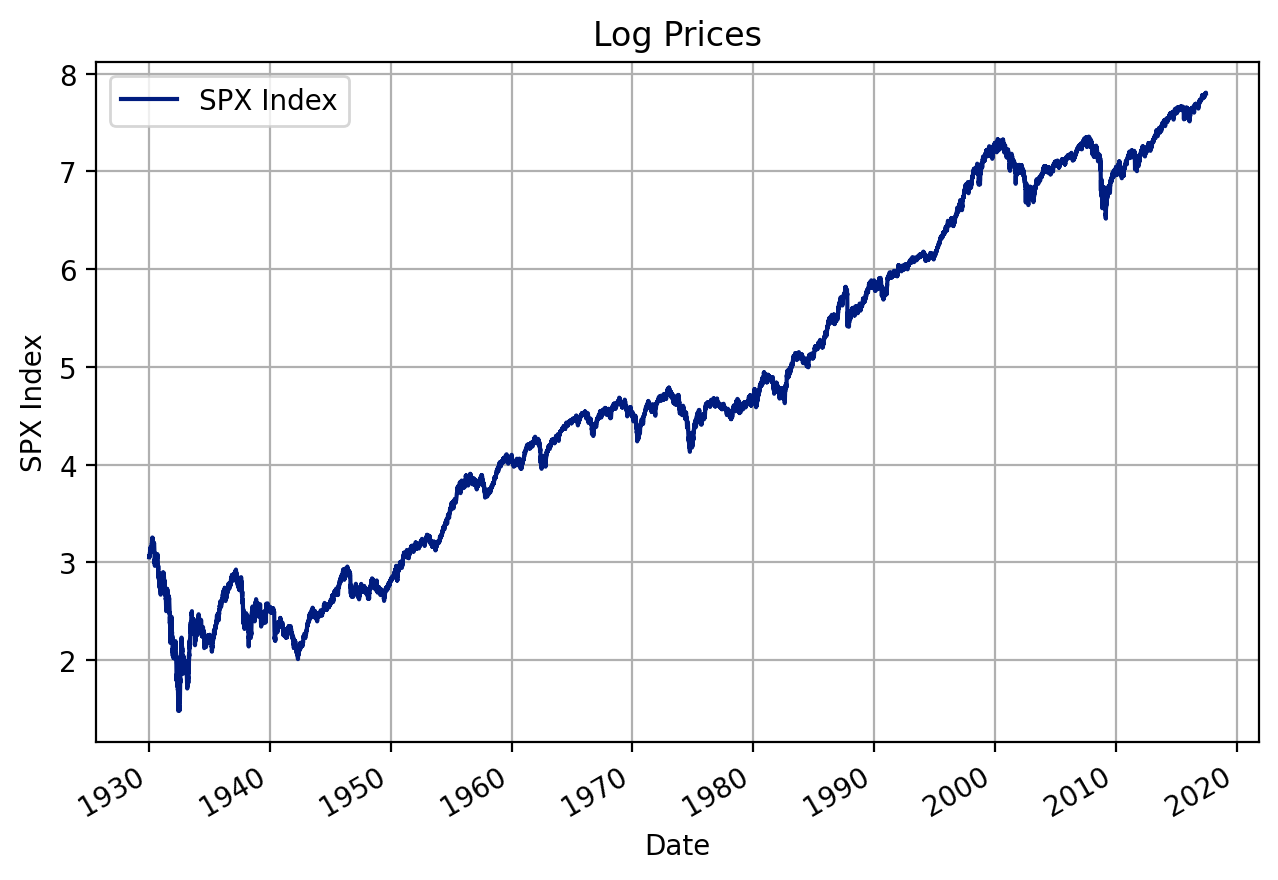

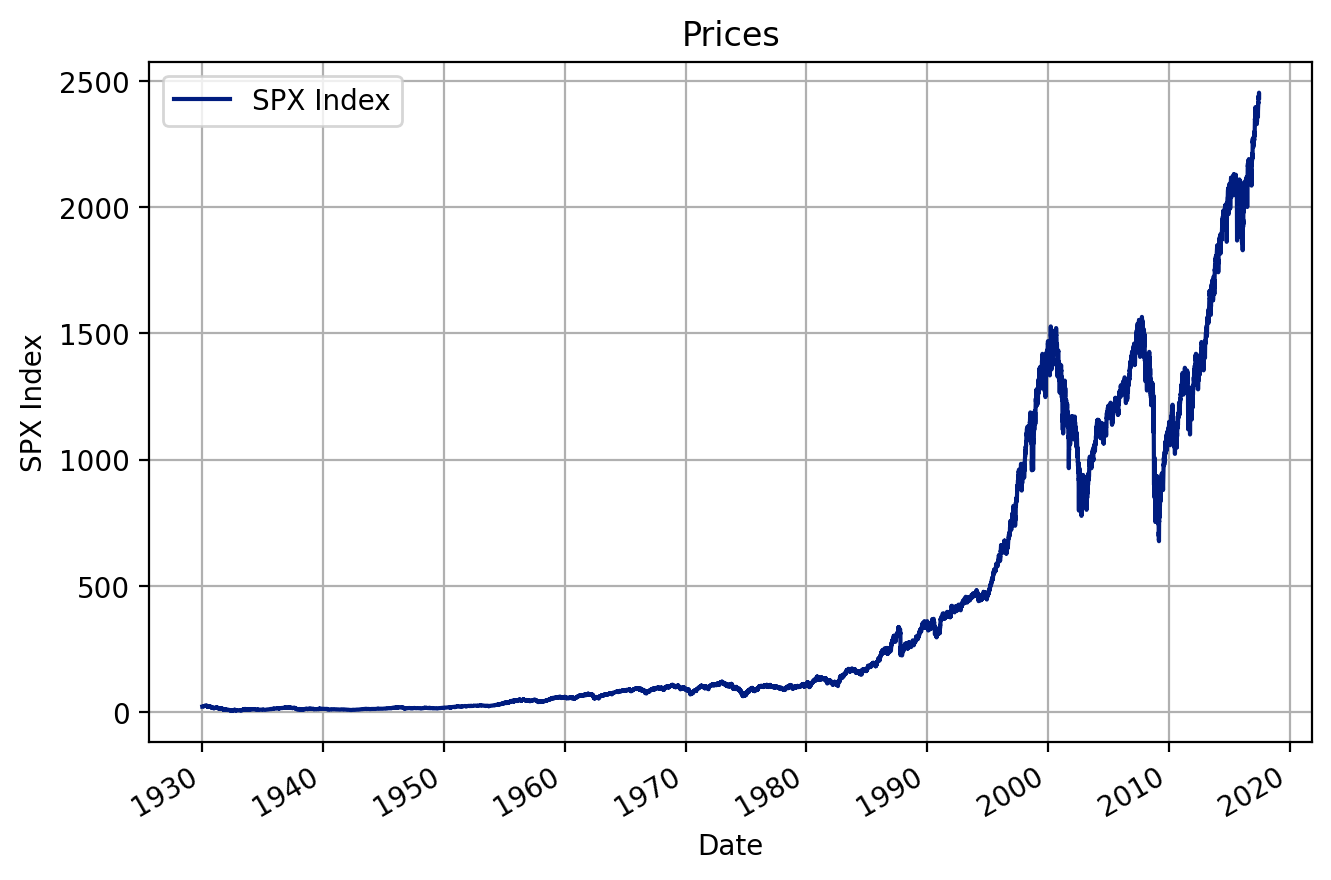

In [3]:
px = pd.read_csv("../../Data/priceData.csv").ffill()
px["date"] = pd.to_datetime(px["date"], format='%d/%m/%Y')
px.set_index(["date"], inplace=True)

logpx = pd.DataFrame(np.log(px["SPX Index"]), index=px.index.copy())
logpx.plot(y="SPX Index", xlabel="Date", ylabel="SPX Index", figsize=(7.5,5), grid=True, title="Log Prices")
plt.savefig('../../figures/RegressionMethods/LogSpxIndex.eps', format='eps')
px.plot(y="SPX Index", xlabel="Date", ylabel="SPX Index", figsize=(7.5,5), grid=True, title="Prices")
plt.savefig('../../figures/RegressionMethods/SpxIndex.eps', format='eps')


# Question 1.2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


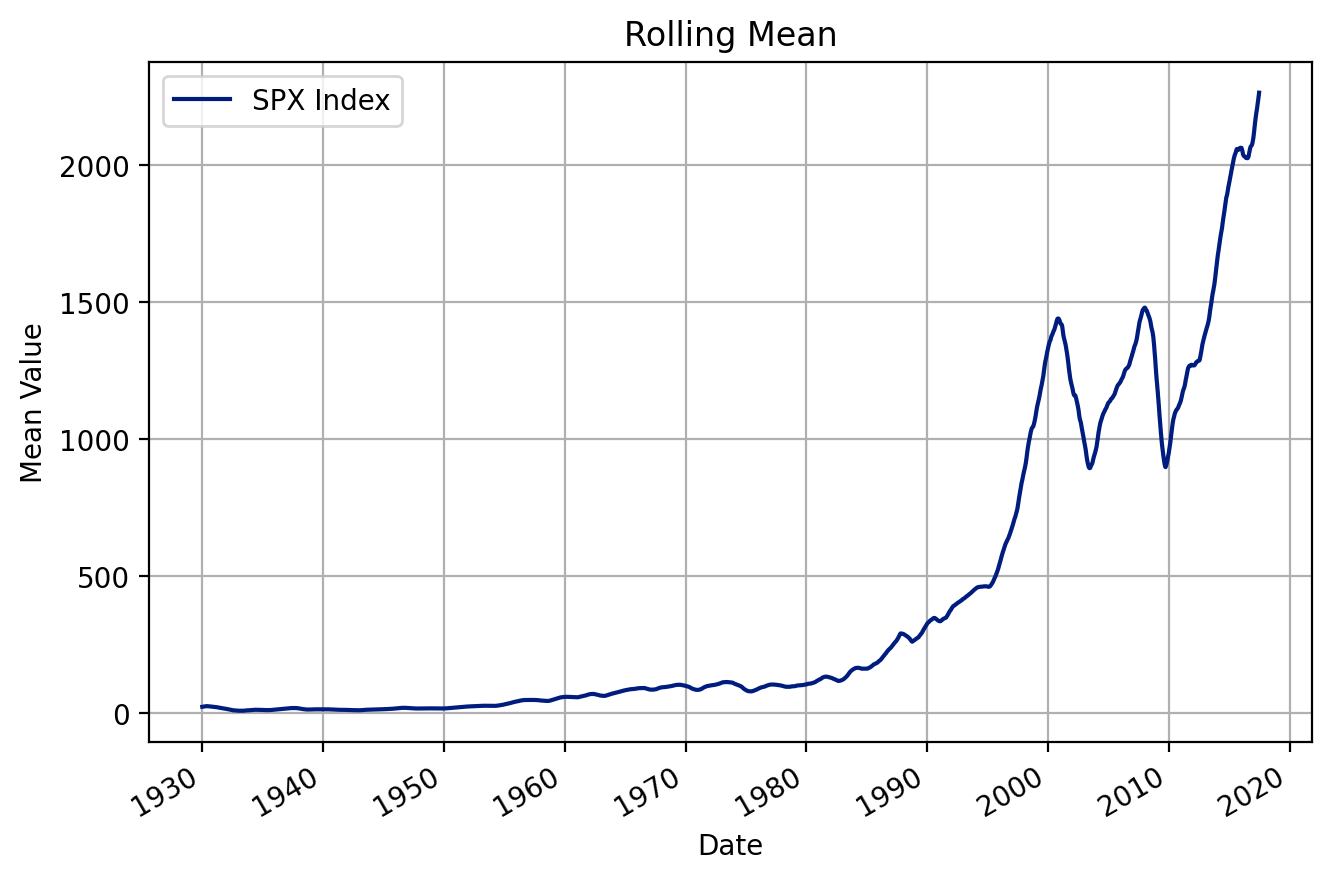

<Figure size 1280x960 with 0 Axes>

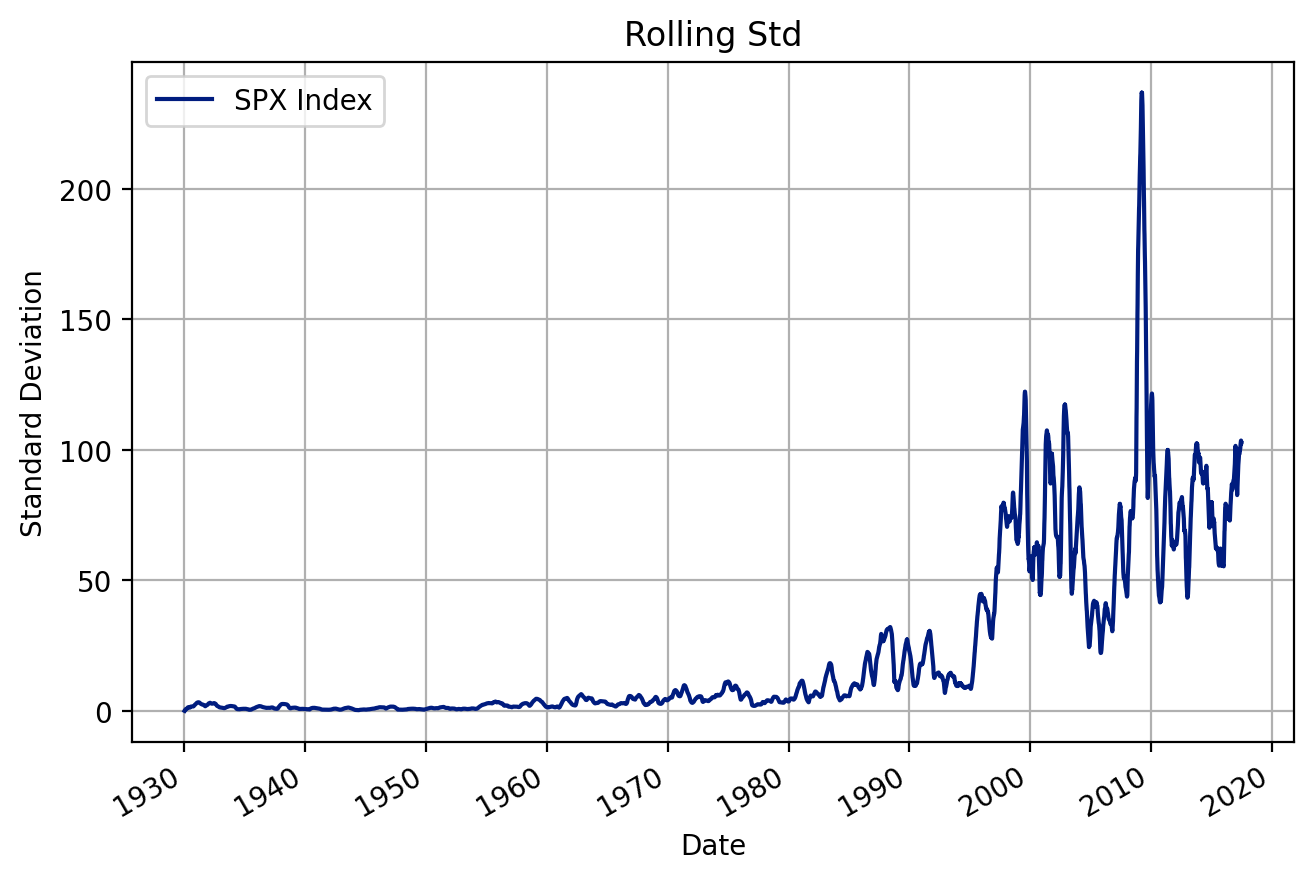

<Figure size 1280x960 with 0 Axes>

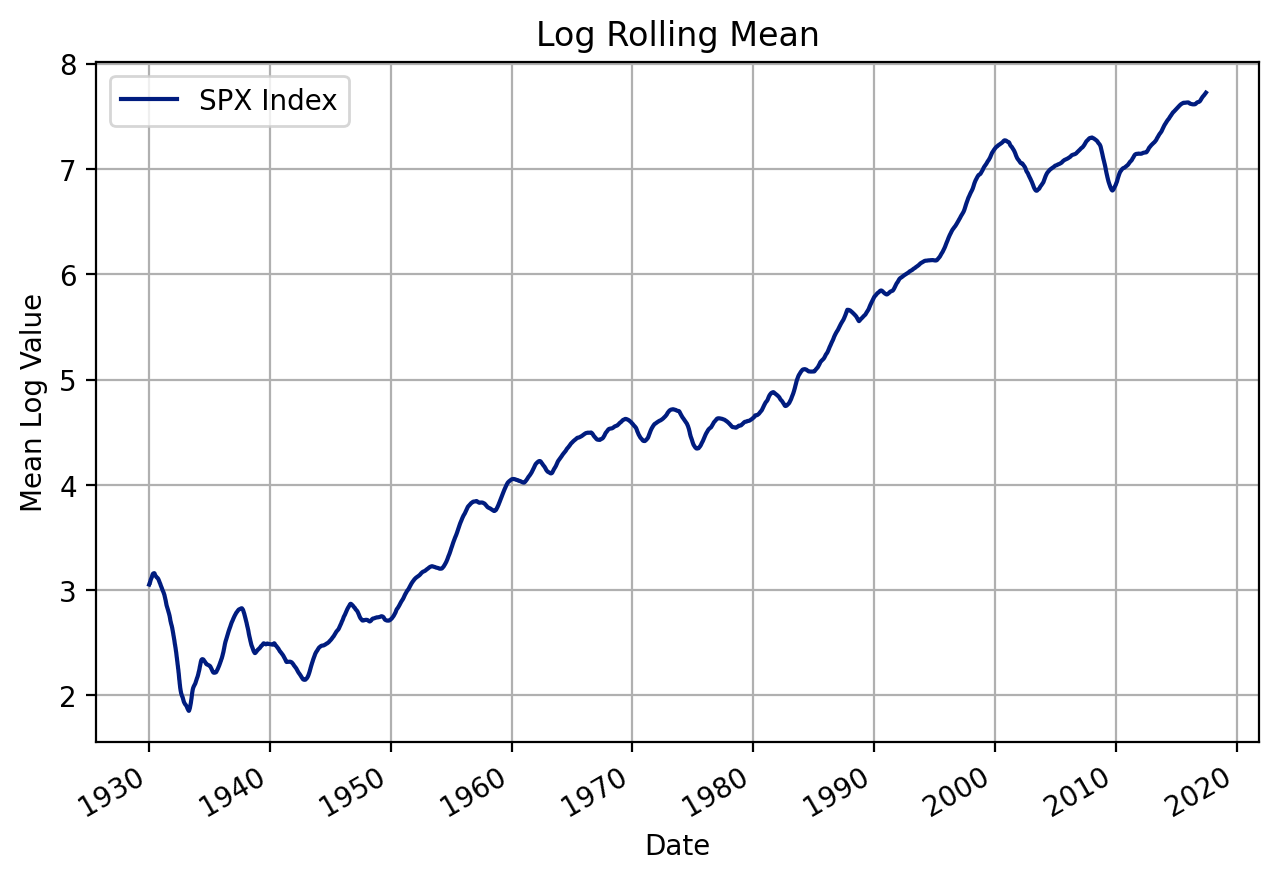

<Figure size 1280x960 with 0 Axes>

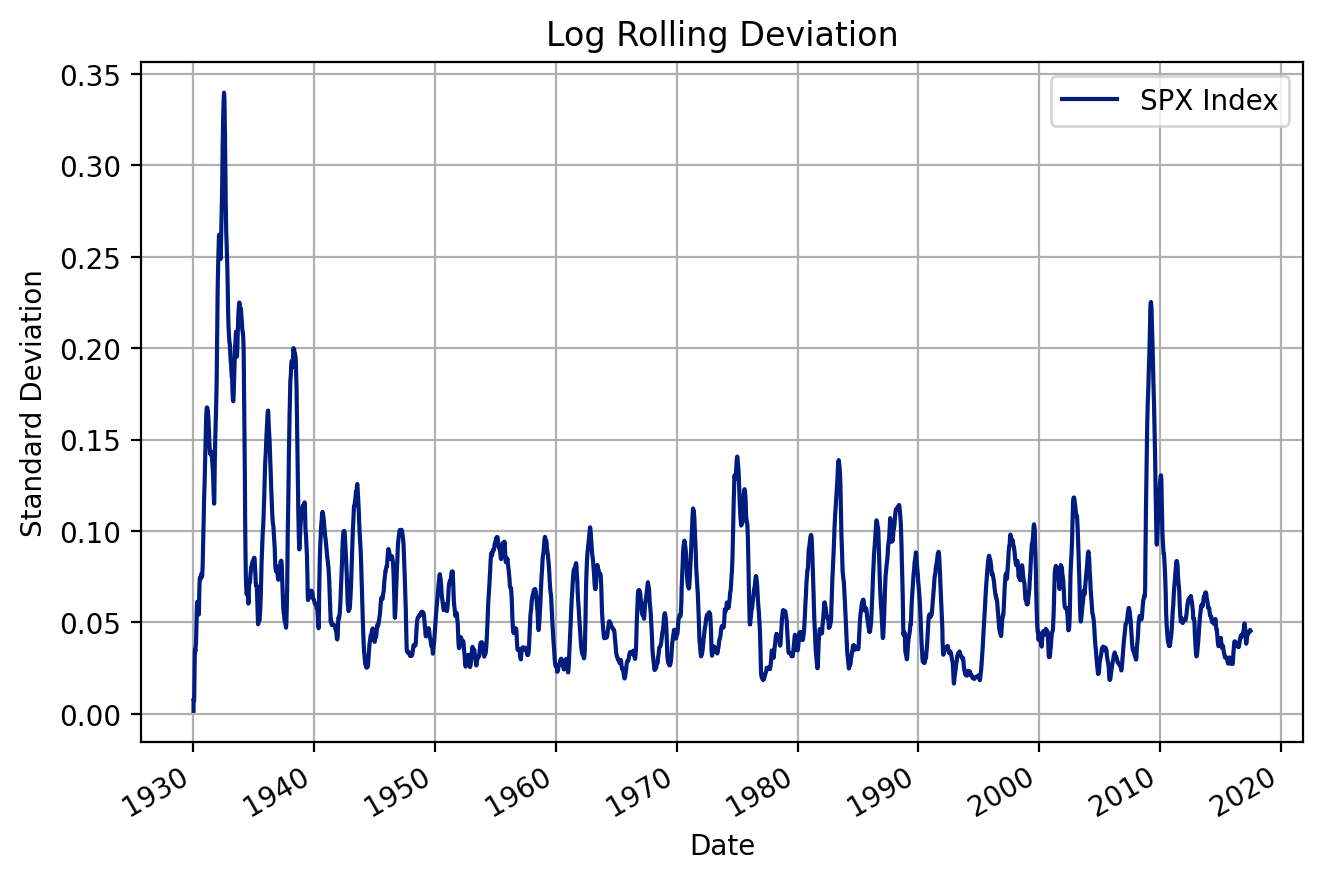

In [4]:
rolling_mean = px.rolling(252, min_periods=1).mean()
rolling_mean.plot(y="SPX Index", xlabel="Date", ylabel="Mean Value", figsize=(7.5, 5),grid=True, title="Rolling Mean")
plt.savefig('../../figures/RegressionMethods/RollingMean.eps', format='eps')

plt.figure()
rolling_std = px.rolling(252, min_periods=1).std()
rolling_std.plot(y="SPX Index", xlabel="Date", ylabel="Standard Deviation", figsize=(7.5, 5),grid=True, title="Rolling Std")
plt.savefig('../../figures/RegressionMethods/RollingStd.eps', format='eps')

plt.figure()
logpx_rolling_mean = logpx.rolling(252, min_periods=1).mean() 
logpx_rolling_mean.plot(y="SPX Index", xlabel="Date", ylabel="Mean Log Value", figsize=(7.5, 5),grid=True, title="Log Rolling Mean")
plt.savefig('../../figures/RegressionMethods/LogRollingMean.eps', format='eps')

plt.figure()
logpx_rolling_std = logpx.rolling(252, min_periods=1).std()
logpx_rolling_std.index = px.index
logpx_rolling_std.plot(y="SPX Index", xlabel="Date", ylabel="Standard Deviation", figsize=(7.5, 5), grid=True, title="Log Rolling Deviation")
plt.savefig('../../figures/RegressionMethods/LogRollingStd.eps', format='eps')

# Question 1.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


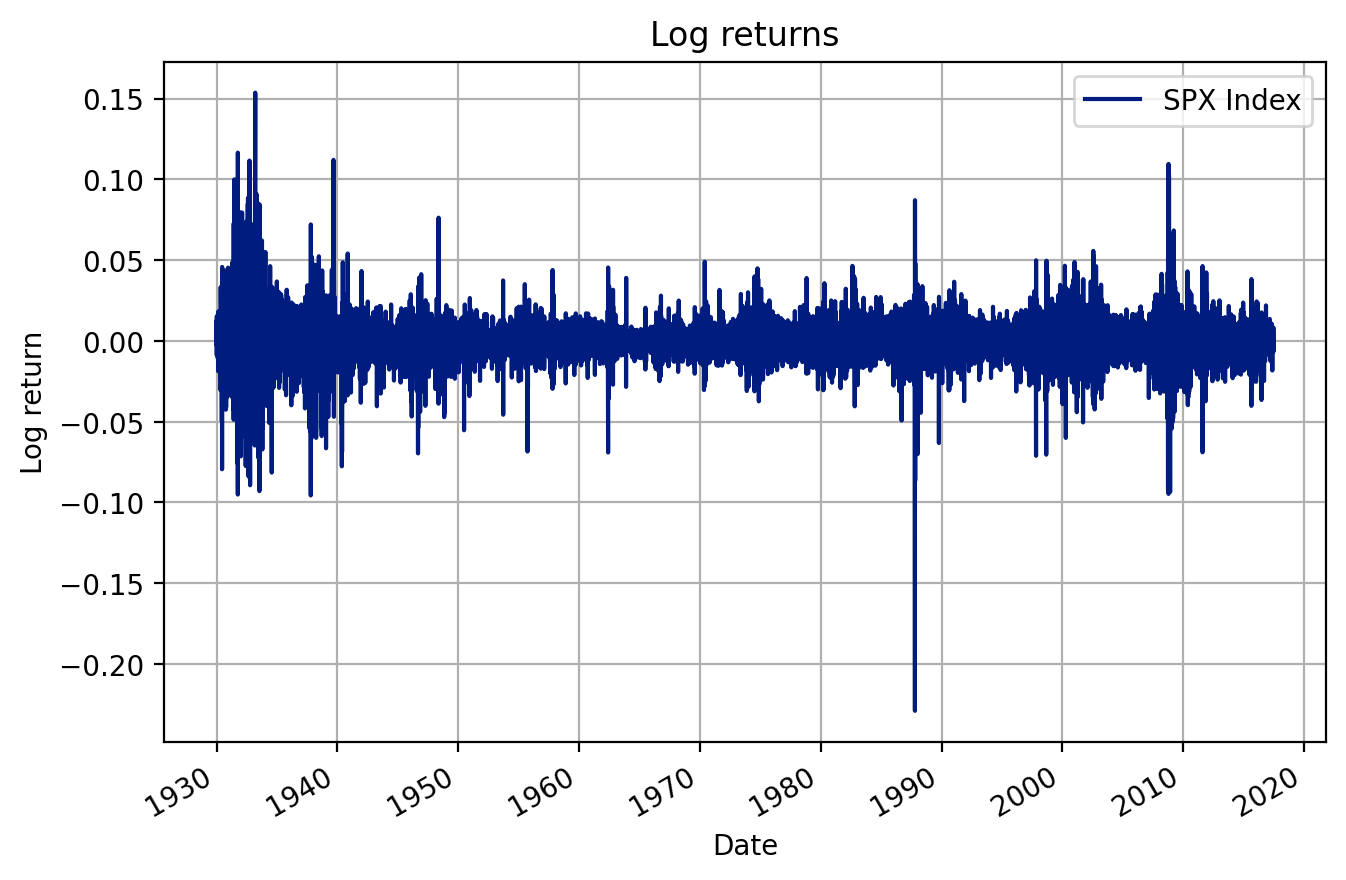

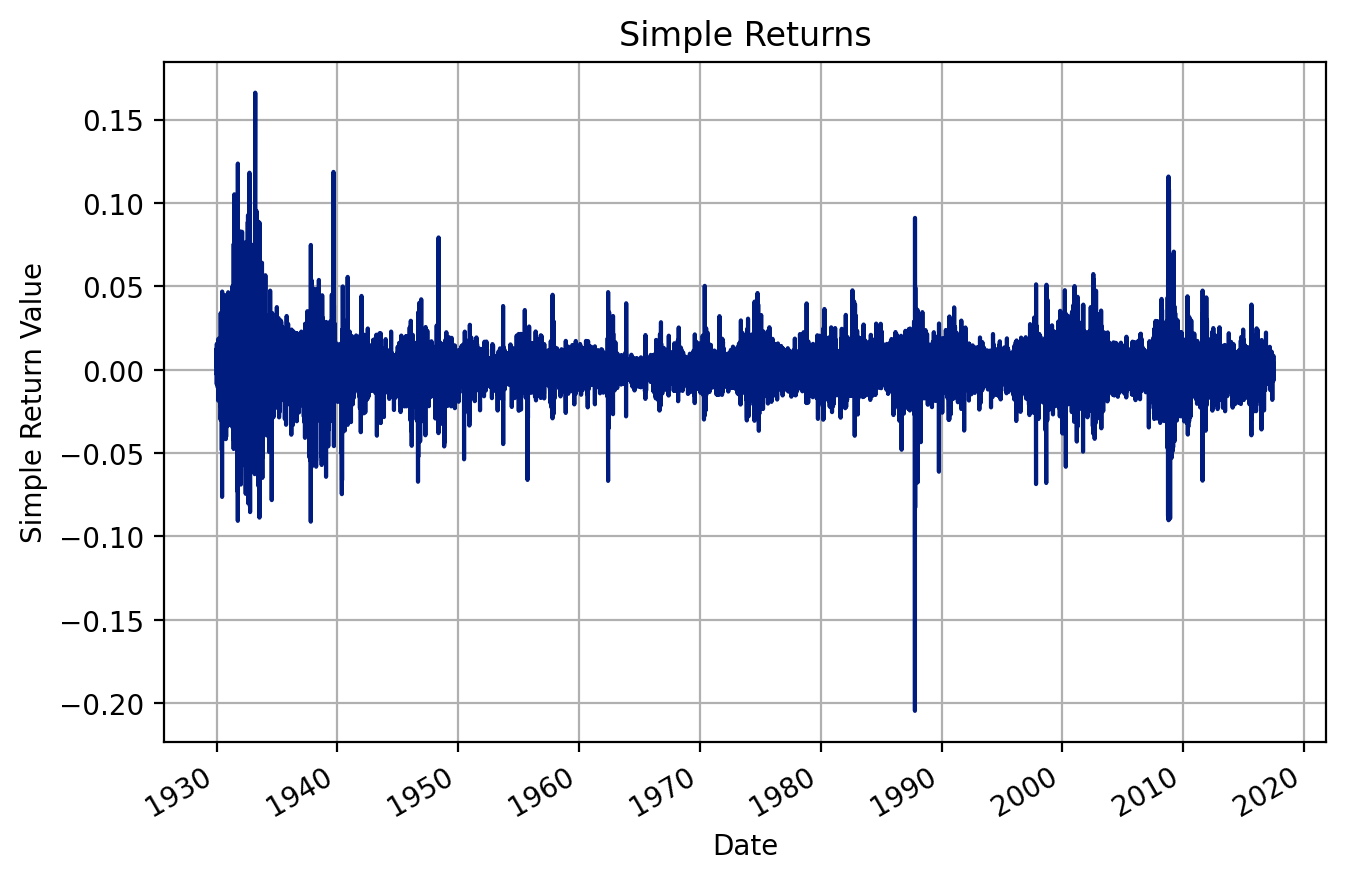

In [5]:
logret = logpx.diff()
logret.plot(y="SPX Index", xlabel="Date", ylabel="Log return", figsize=(7.5, 5),grid=True, title="Log returns")
plt.savefig('../../figures/RegressionMethods/LogReturn.eps', format='eps')
plt.figure()

simpret = px["SPX Index"].pct_change()
simpret.plot(y="SPX Index", xlabel="Date", ylabel="Simple Return Value", figsize=(7.5, 5),grid=True, title="Simple Returns")
plt.savefig('../../figures/RegressionMethods/SimplReturn.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


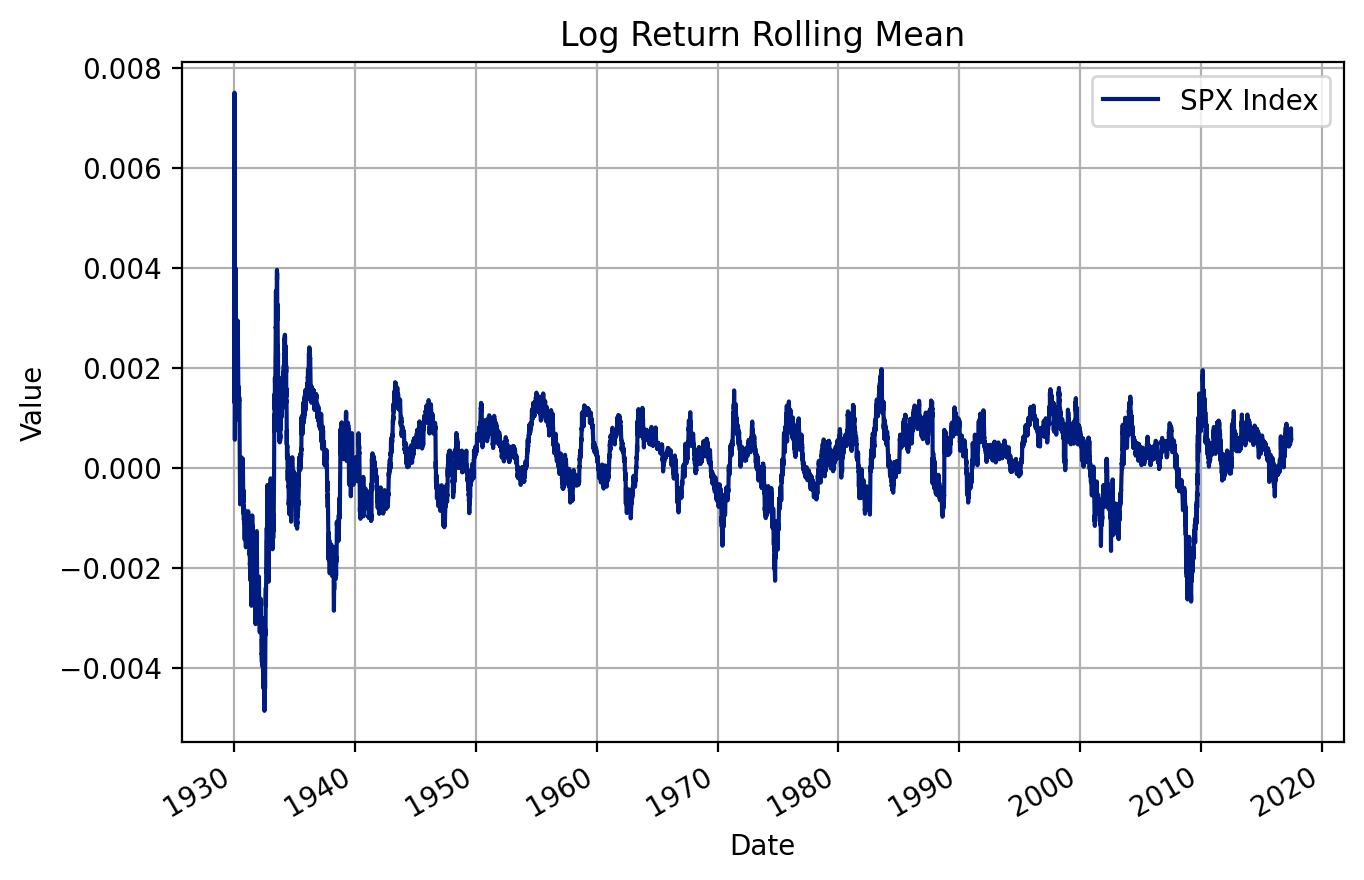

<Figure size 1280x960 with 0 Axes>

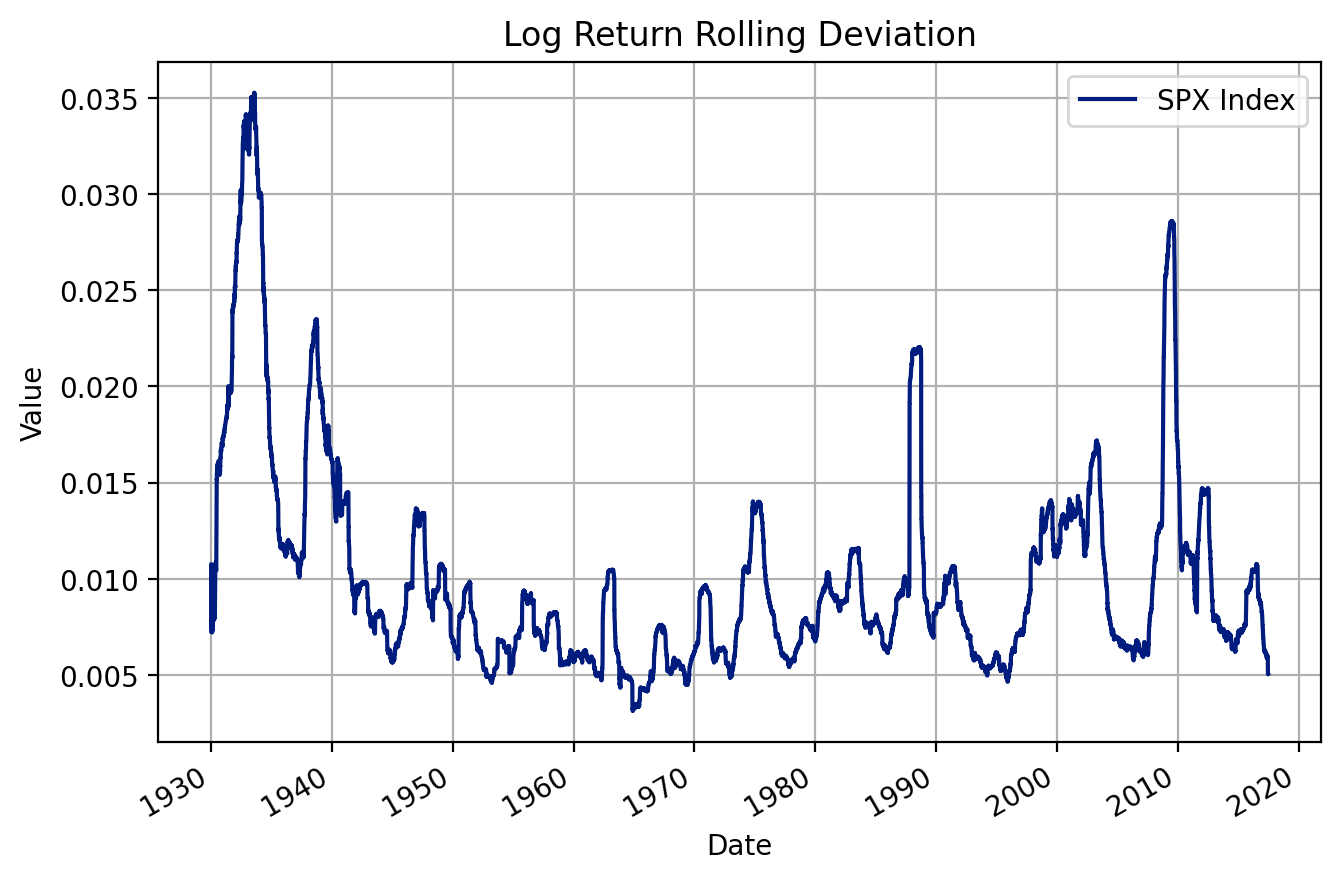

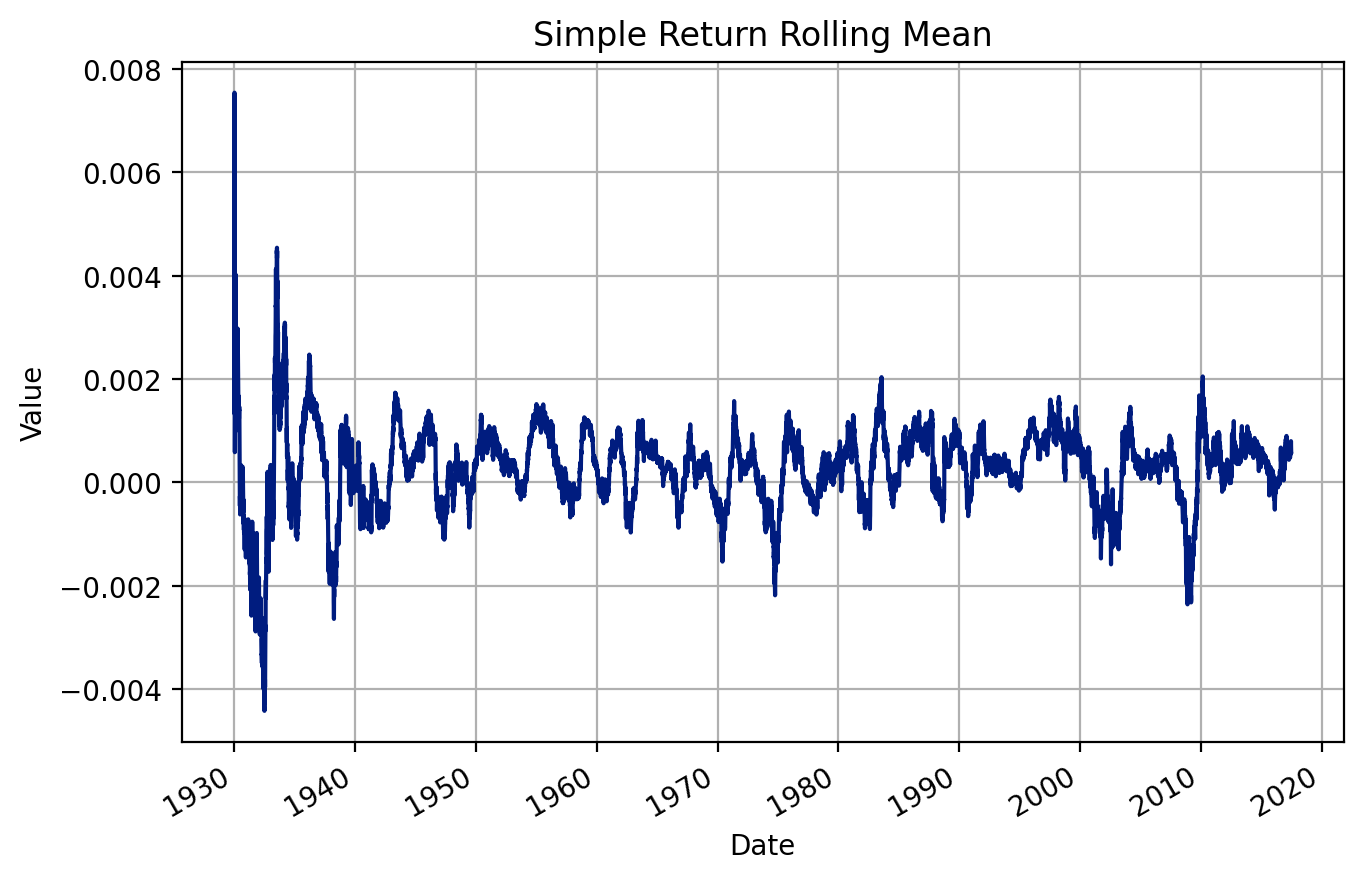

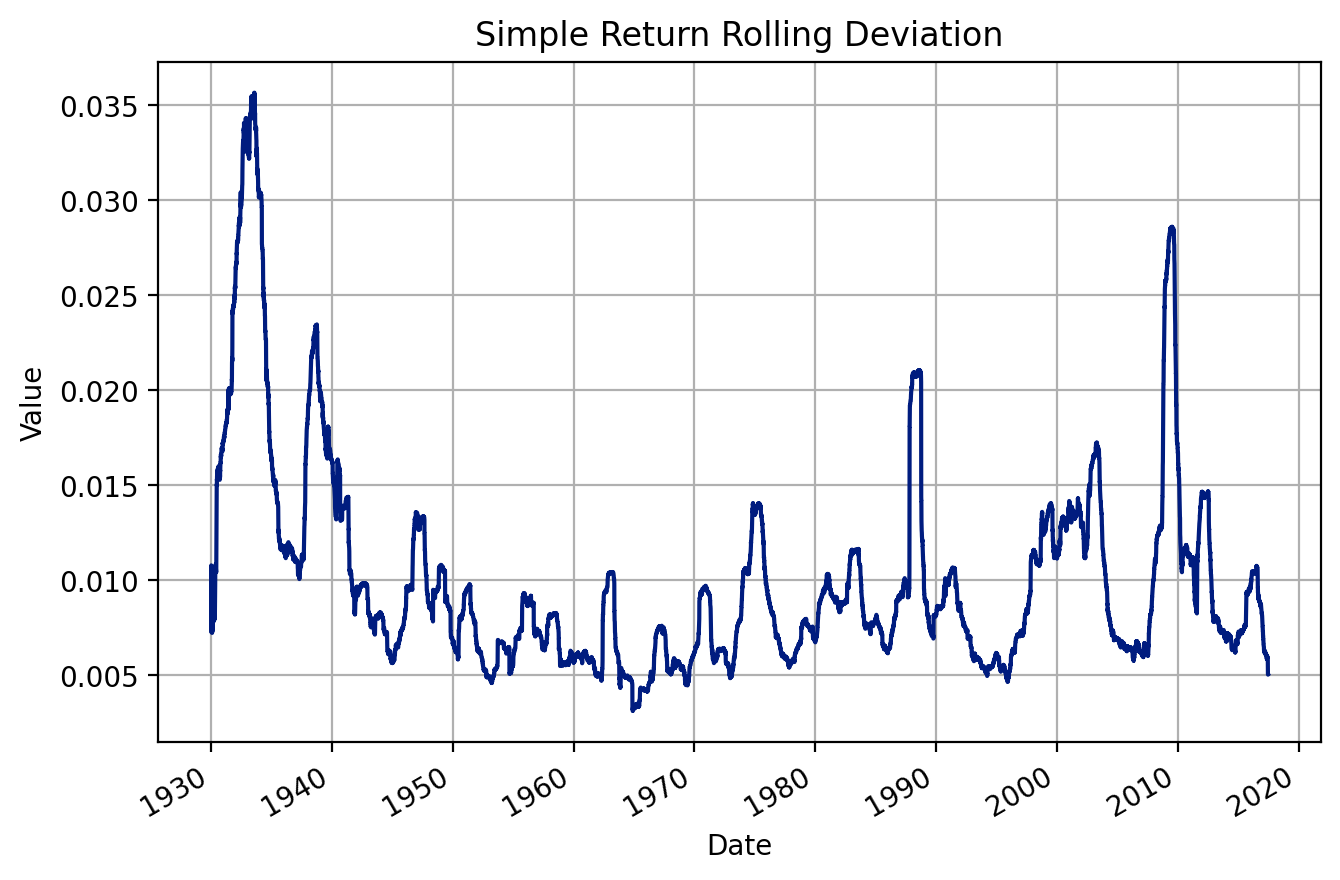

In [6]:
logret_rolling_mean = logret.rolling(252, min_periods=1).mean() 
logret_rolling_mean.plot(y="SPX Index", ylabel="Value", xlabel="Date", title="Log Return Rolling Mean", figsize=(7.5, 5), grid=True)
plt.savefig('../../figures/RegressionMethods/LogReturnRollingMean.eps', format='eps')
plt.figure()

logret_rolling_std = logret.rolling(252, min_periods=1).std() 
logret_rolling_std.plot(y="SPX Index", ylabel="Value", xlabel="Date", title="Log Return Rolling Deviation", figsize=(7.5, 5), grid=True)
plt.savefig('../../figures/RegressionMethods/LogReturnRollingDeviation.eps', format='eps')
plt.figure()

simpret_rolling_mean = simpret.rolling(252, min_periods=1).mean() 
simpret_rolling_mean.plot(y="SPX Index", ylabel="Value", xlabel="Date", title="Simple Return Rolling Mean", figsize=(7.5, 5), grid=True)
plt.savefig('../../figures/RegressionMethods/SimpleReturnRollingMean.eps', format='eps')
plt.figure()

simpret_rolling_std = simpret.rolling(252, min_periods=1).std() 
simpret_rolling_std.plot(y="SPX Index", ylabel="Value", xlabel="Date", title="Simple Return Rolling Deviation", figsize=(7.5, 5), grid=True)
plt.savefig('../../figures/RegressionMethods/SimpleReturnRollingDeviation.eps', format='eps')

# Question 1.4

In [8]:
from scipy import stats
jb_stats = stats.jarque_bera(px["SPX Index"])
print(jb_stats.pvalue)
print(jb_stats.statistic)

0.0
9958.32264117234
SignificanceResult(statistic=np.float64(9958.32264117234), pvalue=np.float64(0.0))


# Question 1.5

Day 1:  Day 2:  Day 3:
$1      $2      $1   
Simp Returns:
Day 1:  Day 2:  Day 3:
0      1        -0.50

Log Returns:
Day 1:  Day 2:  Day 3:
0       0.69     -0.69


Looking at this we can see that logarithmic percentage changes are addative rather than mutiplicative therefore it removes directional bias within our data.


# Question 1.6

When analyzing rapodly changing assets over shorter time frames with smaller overall changes the regular simple returns will approximate closely to that of the log returns while maintaining simplicity. This can be important in fast acting systems as the log can be a computationally expensive operation to compute.